# import

In [1]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import json, html, re
from tqdm import tqdm
from glob import glob
from collections import Counter
from pythainlp import word_tokenize
from pythainlp.corpus import thai_stopwords
STOPWORDS = thai_stopwords()

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
plt.style.use('ggplot')
font_path = '/Users/Nozomi/Library/Fonts/THSarabunNew.ttf'
fp = fm.FontProperties(fname=font_path)

def clean(text, hashtag):
    text = text.replace(hashtag, '')
    text = html.unescape(text)
    text = re.sub(r'http.+?(?:\\s|$)', '', text) # URL link
    text = re.sub(r'[“”„]', '"', text) # convert double quotations into "
    text = re.sub(r'[‘’′′′′`]', "'", text) # convert single quotations into '
    text = re.sub(r'[ \u00a0\xa0\u3000\u2002-\u200a\t\n#]+', ' ', text) # shrink whitespaces e.g. good  boy -> good boy
    text = re.sub(r'[\r\u200b\ufeff]+', '', text) # remove non-breaking space
    text = re.sub(r'ํา','ำ', text) # am
    return text.strip()

def tokenize(text, hashtag):
    tokens = word_tokenize(clean(text, hashtag), keep_whitespace='False')
    tokens = [token for token in tokens if token not in STOPWORDS and re.match(r'[ก-๙][ก-๙\\.\\-]+$', token)]
    return tokens

In [3]:
jsons = sorted(glob('tweets/*.json'))
for i, f in enumerate(sorted(jsons)):
    print(i,f)

0 tweets/#25พฤศจิกาไปSCB.json
1 tweets/#saveวันเฉลิม.json
2 tweets/#กูสั่งให้มึงอยู่ใต้รัฐธรรมนูญ.json
3 tweets/#ธรรมศาสตร์และการชุมนุม.json
4 tweets/#ม็อบ25พฤศจิกาทวงคืนสมบัติชาติ.json
5 tweets/#ม็อบ2ธันวา.json
6 tweets/#เกียมอุดมไม่ก้มหัวให้เผด็จการ.json
7 tweets/test.json


In [4]:
test = pd.read_json(jsons[-1], lines=True)
test

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1333443258668576775,1333443258668576768,2020-11-30 23:10:21+07:00,2020-11-30,23:10:21,700,1233994872526233600,teewanwalee,ตี้ วรรณวลี - ตี้ พะเยา,,...,,,,,,[],,,,
1,1333043259707297796,1333043259707297792,2020-11-29 20:40:54+07:00,2020-11-29,20:40:54,700,920984007159853057,bonusbutterfly,B_Butterfly,,...,,,,,,[],,,,
2,1332690755563913219,1332683419092881408,2020-11-28 21:20:10+07:00,2020-11-28,21:20:10,700,920984007159853057,bonusbutterfly,B_Butterfly,,...,,,,,,"[{'screen_name': 'shutup2557', 'name': '📌Shutu...",,,,
3,1332509726861455365,1332509726861455360,2020-11-28 09:20:50+07:00,2020-11-28,09:20:50,700,920984007159853057,bonusbutterfly,B_Butterfly,,...,,,,,,[],,,,
4,1332506775606546432,1332483157480722432,2020-11-28 09:09:06+07:00,2020-11-28,09:09:06,700,920984007159853057,bonusbutterfly,B_Butterfly,,...,,,,,,"[{'screen_name': 'jomquan', 'name': 'Jomquan',...",,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,1329722979979128832,1329722979979128832,2020-11-20 16:47:18+07:00,2020-11-20,16:47:18,700,3190646936,irose015,i.ro.se,,...,,,,,,[],,,,
829,1329717559478816770,1329717559478816768,2020-11-20 16:25:45+07:00,2020-11-20,16:25:45,700,1281877606929842176,phiwant,ซากทัพ III ทีมข้อเดียว สหพันธรัฐไทย,,...,,,,,,[],,,,
830,1329707364899909632,1329707364899909632,2020-11-20 15:45:15+07:00,2020-11-20,15:45:15,700,1281877606929842176,phiwant,ซากทัพ III ทีมข้อเดียว สหพันธรัฐไทย,,...,,,,,,[],,,,
831,1329703561714757636,1329703561714757632,2020-11-20 15:30:08+07:00,2020-11-20,15:30:08,700,522197244,dr_dumnern,ดร.ดำเนิน ยาท้วมNEWS,,...,,,,,,[],,,,


In [10]:
test[test.username == 'OjrAmm'].tweet

Series([], Name: tweet, dtype: object)

In [16]:
test.iloc[3].quote_url

'https://twitter.com/SlumBombay/status/1332479640145858561'

In [ ]:
test.iloc[1].quote_url

In [17]:
test.iloc[1].link.split('/')

['https:',
 '',
 'twitter.com',
 'BoNusButterfly',
 'status',
 '1333043259707297796']

# open file

In [3]:
df0 = pd.read_json(jsons[0], lines=True)
df1 = pd.read_json(jsons[1], lines=True)
df2 = pd.read_json(jsons[2], lines=True)
df3 = pd.read_json(jsons[3], lines=True)
df4 = pd.read_json(jsons[4], lines=True)
df5 = pd.read_json(jsons[5], lines=True)
#df6 = pd.read_json(jsons[6], lines=True)
#df7 = pd.read_json(jsons[7], lines=True)

In [4]:
dfs = [df0,df1,df2,df3,df4,df5]#,df6,df7]

In [31]:
# how to create only day and hour
df0['created_at'].apply(lambda x: f"{x.year}-{x.month}-{x.day}-{x.hour}")

0          2021-5-8-9
1        2021-4-19-21
2         2021-4-13-7
3        2021-4-11-17
4         2021-4-6-10
             ...     
19060    2020-11-17-0
19061    2020-11-17-0
19062    2020-11-17-0
19063    2020-11-17-0
19064    2020-11-17-0
Name: created_at, Length: 19065, dtype: object

# overview

#กูสั่งให้มึงอยู่ใต้รัฐธรรมนูญ


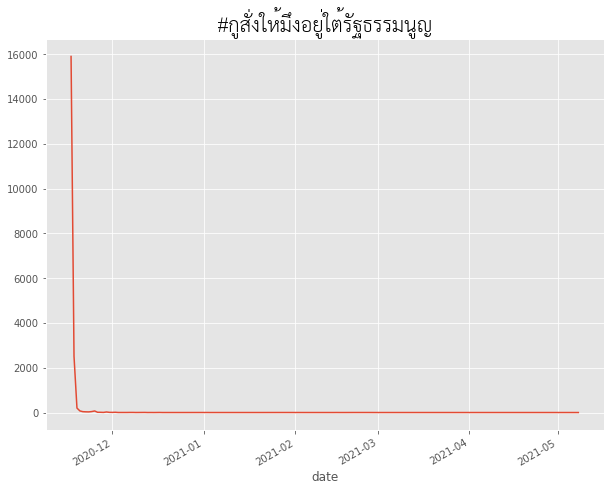

#16ตุลาไปแยกปทุมวัน


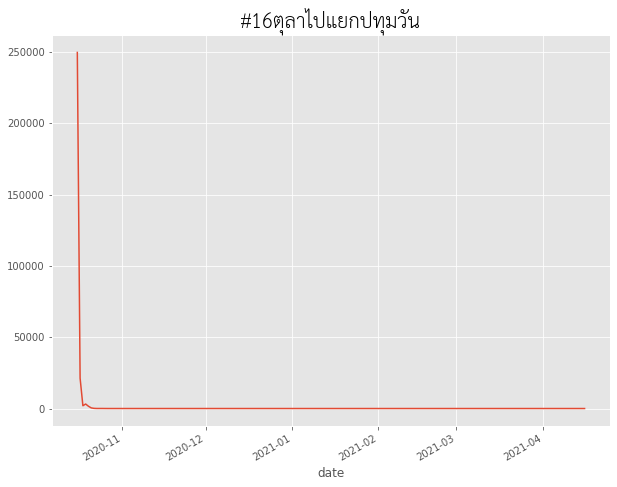

#saveวันเฉลิม


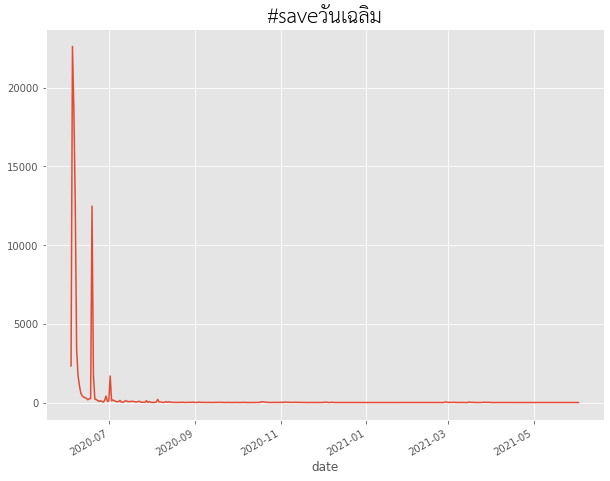

#ธรรมศาสตร์และการชุมนุม


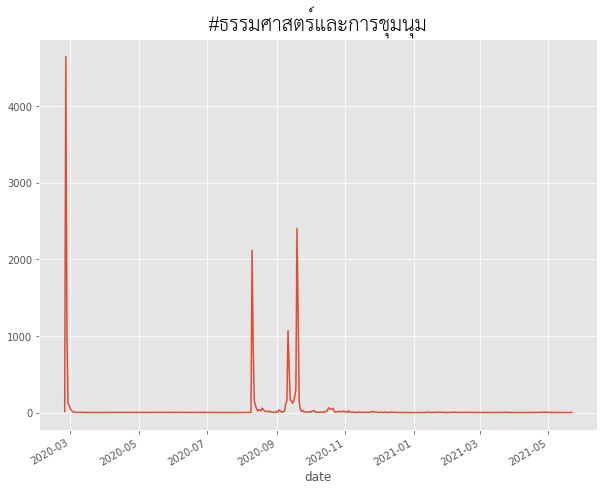

#เกียมอุดมไม่ก้มหัวให้เผด็จการ


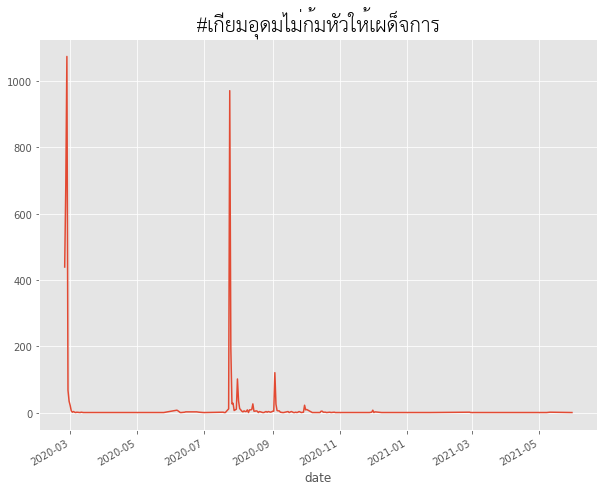

#25พฤศจิกาไปSCB


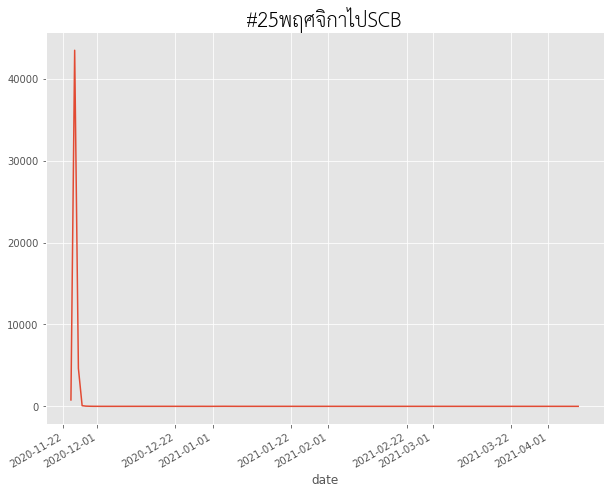

#ม็อบ25พฤศจิกาทวงคืนสมบัติชาติ


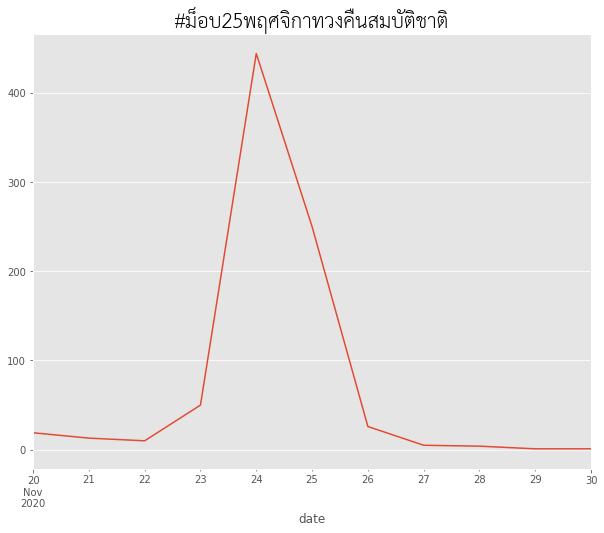

#ม็อบ2ธันวา


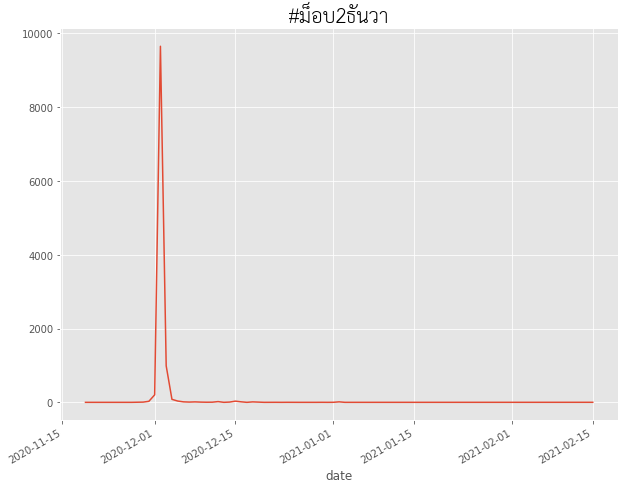

In [5]:
for i, df in enumerate(dfs):
    fig = plt.figure(figsize=(10,8))
    hashtag = jsons[i].split('/')[1].replace('.json','')
    print(hashtag)
    df.groupby(df["date"]).count()['id'].plot()
    plt.title(hashtag, fontproperties=fp, fontsize=30)
    plt.show()

#ม็อบ2ธันวา


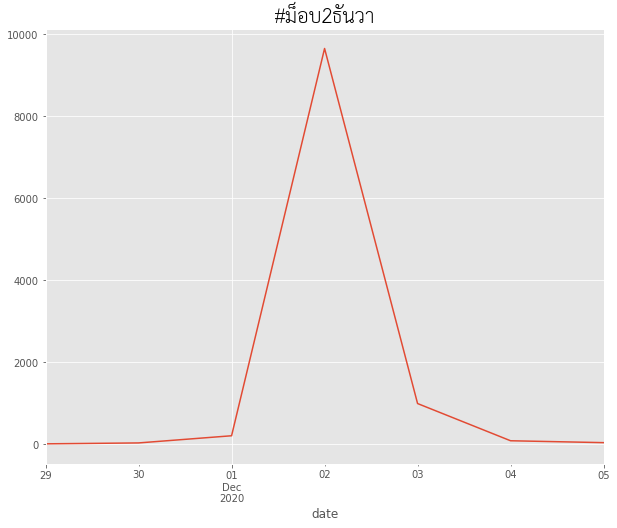

In [6]:
### find peak ###

fig = plt.figure(figsize=(10,8))

i = 7
#df = dfs[i]
#df = dfs[i][dfs[i].date <= '2020-3-1']
df = dfs[i][(dfs[i].date >= '2020-11-28') & (dfs[i].date <= '2020-12-05')]

hashtag = jsons[i].split('/')[1].replace('.json','')
print(hashtag)
df.groupby(df["date"]).count()['id'].plot()
plt.title(hashtag, fontproperties=fp, fontsize=30)
plt.show()

# overview2

In [75]:
i = 0
df = dfs[i]
hashtag = jsons[i].split('/')[1].replace('.json','')

print('total', len(df))
print('people', len(df.groupby('username').count()['id']))

total 17656
people 8087


In [74]:
for i, v in df.groupby('username').count()['id'].sort_values(ascending=False).value_counts().sort_index().iteritems():
    print(f"|{i}|{v}|")

8286 people
|1|5604|
|2|1202|
|3|493|
|4|269|
|5|157|
|6|92|
|7|90|
|8|53|
|9|49|
|10|41|
|11|32|
|12|24|
|13|17|
|14|16|
|15|13|
|16|18|
|17|17|
|18|10|
|19|11|
|20|8|
|21|9|
|22|3|
|23|8|
|24|1|
|25|3|
|26|4|
|27|2|
|29|1|
|30|2|
|31|1|
|32|1|
|33|2|
|34|1|
|35|3|
|36|3|
|37|1|
|38|1|
|39|2|
|40|3|
|41|2|
|42|1|
|44|1|
|45|2|
|47|2|
|48|1|
|49|2|
|56|1|
|59|1|
|62|1|
|68|2|
|118|1|
|136|1|
|355|1|


# active users & influential # associated hashtags

~~~
0 tweets/#กูสั่งให้มึงอยู่ใต้รัฐธรรมนูญ.json
1 tweets/#16ตุลาไปแยกปทุมวัน.json
2 tweets/#saveวันเฉลิม.json
3 tweets/#ธรรมศาสตร์และการชุมนุม.json
4 tweets/#เกียมอุดมไม่ก้มหัวให้เผด็จการ.json
5 tweets/#25พฤศจิกาไปSCB.json
6 tweets/#ม็อบ25พฤศจิกาทวงคืนสมบัติชาติ.json
7 tweets/#ม็อบ2ธันวา.json
~~~

In [6]:
i = 3
df = dfs[i]
hashtag = jsons[i].split('/')[1].replace('.json','')

# define duration 
#df = df[(df.date >= '2020-06-17') & (df.date <= '2020-06-21')]
df = df[(df.date >= '2020-2-24') & (df.date <= '2020-2-28')]

print(hashtag)
print('\n- total tweets :', len(df))
print('- distinct users :', len(df.groupby('username').count()['id']))
#print('- oldest tweet : ')
#print('- peak : ')
print()

# active user posts
print("|num of posts (per person)|num of people|\n|:-:|:-:|")
for i, v in df.groupby('username').count()['id'].sort_values(ascending=False).value_counts().sort_index().iteritems():
    print(f"|{i}|{v}|")

#ธรรมศาสตร์และการชุมนุม

- total tweets : 5813
- distinct users : 3732

|num of posts (per person)|num of people|
|:-:|:-:|
|1|2831|
|2|469|
|3|198|
|4|98|
|5|43|
|6|29|
|7|20|
|8|11|
|9|10|
|10|4|
|11|3|
|12|1|
|13|2|
|14|5|
|15|1|
|16|1|
|17|4|
|18|1|
|53|1|


In [166]:
# influential tweets
df.sort_values(["retweets_count"], ascending=False)[['created_at','username','tweet','retweets_count']].head(10)

,created_at,username,tweet,retweets_count
33947,2020-11-25 15:08:05+07:00,realkullllabcd,รีจนกว่าจะครบล้าน 7 นาที คาถาเบิกเนตร #25พฤศจ...,130943
42462,2020-11-25 10:39:41+07:00,mensblack_,จะบอกว่าตอนนี้พวกบริษัทที่เป็นเจ้าของตู้ที่โดน...,107821
46333,2020-11-25 07:38:24+07:00,jks05949033,อันนี้คือกั้นม็อบหรือฉากหนังซอมบี้ 555555555 ...,72293
32012,2020-11-25 15:56:36+07:00,realkullllabcd,ปิดเอง ด่าเอง โป๊ะเอง คนแหก ลบโพส แต่บอกเรยนะค...,70889
18891,2020-11-25 22:24:07+07:00,momo25402,ต่อหน้าต่อตามาก #25พฤศจิกาไปSCB https://t.co/...,64599
11159,2020-11-25 23:00:27+07:00,beforeweshine,กลุ่มอาชีวะต้องวิ่งไปบอกนักข่าวทุกสำนีกเลยว่า ...,63192
13100,2020-11-25 22:51:19+07:00,kugkigz,ใช่มั้ย #25พฤศจิกาไปSCB https://t.co/Ep5CJd7tik,55922
35937,2020-11-25 14:08:48+07:00,_mnpqs,คนที่ขายตู้ container ให้ทหาร ล่าสุดลบโพสต์ไปแ...,49757
18400,2020-11-25 22:27:20+07:00,bo027p,ผู้ชายในภาพที่ใส่หมวกกันน็อคปาระเบิด คาดว่าเป็...,49437
45814,2020-11-25 08:11:43+07:00,nichada9428,ดูออกป่ะ ว่าเป็นตำรวจทหาร ดูไม่ออกหรอกเนอะ #2...,46859


In [8]:
##### influential tweet #####
print("|datetime|username|tweet|retweet|url|\n|:-:|:-:|:-:|:-:|:-:|")
for i, row in df.sort_values(["retweets_count"], ascending=False)[['created_at','username','tweet','retweets_count','link']].head(10).iterrows():
    row['created_at'] = str(row['created_at']).split('+')[0]
    row['retweets_count'] = str(row['retweets_count'])
    row['link'] = f"[link]({row['link']})"
    print('|'+"|".join(row)+"|")
print()
    


|datetime|username|tweet|retweet|url|
|:-:|:-:|:-:|:-:|:-:|
|2020-12-02 19:57:34|arttold|จุกอก #ม็อบ2ธันวา  https://t.co/xOLjLFMlIH|84481|[link](https://twitter.com/arttold/status/1334119518570909696)|
|2020-12-02 15:18:16|tanawatofficial|ด่วน ! #ศาลรัฐธรรมนูญ วินิจฉัยให้ประยุทธ์รอด ไม่พ้นจากตำแหน่งนายก จากกรณีพักบ้านหลวง แม้เกษียณมา 6 ปีแล้ว  #ม็อบ2ธันวา  https://t.co/AKnmiMt07D|31488|[link](https://twitter.com/tanawatofficial/status/1334049228100829184)|
|2020-12-02 12:54:18|vanwongyai|เจอพี่คนนี้ที่หน้าสำนักงานตำรวจ อย่าปล่อยพี่เขาสู้คนเดียวนะทุกคน #ม็อบ2ธันวา  https://t.co/7vzG2jVL90|27177|[link](https://twitter.com/vanwongyai/status/1334013000047419393)|
|2020-12-02 11:59:02|jxsehun20_|ป้ายรถเมล์หน้าศาลอาญา แบบนี้ควรมีทั่วประเทศป่ะ ทำก็ทำได้หนิ แต่สภาพรถคือ ฟีลป้ายLEDบอกเวลาอย่างดีตรงเวลาด้วย แต่รถเมล์พัดลมแดงใช้มาแล้ว20กว่าปี #ม็อบ2ธันวา  https://t.co/3Aox2DYcUa|23481|[link](https://twitter.com/jxsehun20_/status/1333999090263179264)|
|2020-12-02 18:55:26|baekmq_|ที่นครศรีฯตอนนี้น

# hashtags

~~~
0 tweets/#25พฤศจิกาไปSCB.json
1 tweets/#saveวันเฉลิม.json
2 tweets/#กูสั่งให้มึงอยู่ใต้รัฐธรรมนูญ.json
3 tweets/#ธรรมศาสตร์และการชุมนุม.json
4 tweets/#ม็อบ25พฤศจิกาทวงคืนสมบัติชาติ.json
5 tweets/#ม็อบ2ธันวา.json
6 tweets/#เกียมอุดมไม่ก้มหัวให้เผด็จการ.json
~~~

In [5]:
jsons[3]

'tweets/#ธรรมศาสตร์และการชุมนุม.json'

In [10]:
i = 3
df = dfs[i]
hashtag = jsons[i].split('/')[1].replace('.json','')

### define duration ###
df = df[(df.date >= '2020-9-9') & (df.date <= '2020-9-21')]

### tokenize ###
df['tokens'] = df.tweet.apply(lambda x: tokenize(x, hashtag))

##### hashtags #####
counter = Counter()
for lst in df.hashtags:
    counter.update(lst)
    
hashtag2word = {x[0]:Counter() for x in counter.most_common(16)[1:]}

# count frequent words
for i, row in df.iterrows():
    for hashtag in row['hashtags']:
        if hashtag in hashtag2word:
            hashtag2word[hashtag].update(row['tokens'])
    
print("|hashtag|count|frequent words|oldest|popular|\n|:-:|:-:|:-:|:-:|:-:|")
for tag, c, in counter.most_common(16)[1:]:
    tempdf = df[df.hashtags.apply(lambda x: tag in x)].sort_values(['created_at'])
    
    ## frequent words
    freqs = " ".join([f"{w}({c})" for w,c in hashtag2word[tag].most_common(10)])
    
    ## oldest
    oldest = tempdf.iloc[0].tweet
    oldest_name = tempdf.iloc[0].username
    oldest_link = tempdf.iloc[0].link
    oldest_date = str(tempdf.iloc[0]['created_at']).split('+')[0]
    
    ## popular
    tempdf = tempdf.sort_values(["retweets_count"], ascending=False)
    popular = tempdf.iloc[0].tweet
    popular_name = tempdf.iloc[0].username
    popular_link = tempdf.iloc[0].link
    popular_date = str(tempdf.iloc[0]['created_at']).split('+')[0]
    retweet_count = tempdf.iloc[0].retweets_count
    
    print(f"|{tag}|{c}|{freqs}|[{oldest_date}]({oldest_link})<br>[@{oldest_name}](https://twitter.com/{oldest_name})<br><br>{oldest.replace('|||','')}|[{popular_date}]({popular_link})<br>[@{popular_name}](https://twitter.com/{popular_name})<br>{retweet_count} retweets<br><br>{popular.replace('|||','')}|")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


|hashtag|count|frequent words|oldest|popular|
|:-:|:-:|:-:|:-:|:-:|
|19กันยาทวงอํานาจคืนราษฎร|2013|กันยา(2579) คืน(2451) ทวง(2434) อำนาจ(2413) ราษฎร(2191) ประชาชน(476) ชุมนุม(464) รา(364) ษฏร(356) ม็อบ(308)|[2020-09-09 19:57:25](https://twitter.com/MatichonTV/status/1303678898765398016)<br>[@matichontv](https://twitter.com/matichontv)<br><br>"รุ้ง-เพนกวิน-ไมค์" แถลงยุทธศาสตร์ชุมนุมใหญ่ 19 กันยายน ประกาศค้างคืนก่อนเดินขบวนไปทำเนียบรัฐบาล  ชมคลิป  https://t.co/1CPcQiIVnl  #19กันยา #19กันยาทวงอํานาจคืนราษฎร #19กันยาออกมาปลดแอก #ประชาชนปลดแอก #ธรรมศาสตร์และการชุมนุม  https://t.co/y9AwOXcTHk|[2020-09-16 23:19:05](https://twitter.com/KhaosodOnline/status/1306266364626173953)<br>[@khaosodonline](https://twitter.com/khaosodonline)<br>15689 retweets<br><br>ปิดมหาวิทยาลัย!! มธ.สั่งปิดมธ.ท่าพระจันทร์ งดกิจกรรมทุกอย่าง เข้า-ออกฝั่งถนนพระอาทิตย์อย่างเดียว สกัดม็อบ #19กันยาทวงอํานาจคืนราษฎร ของ #ธรรมศาสตร์และการชุมนุม  https://t.co/pMfxleWMPr|
|19กันยาทวงอํานาจคืนราษฏร|1663|กันยา(2431) คืน(2309) ทวง

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

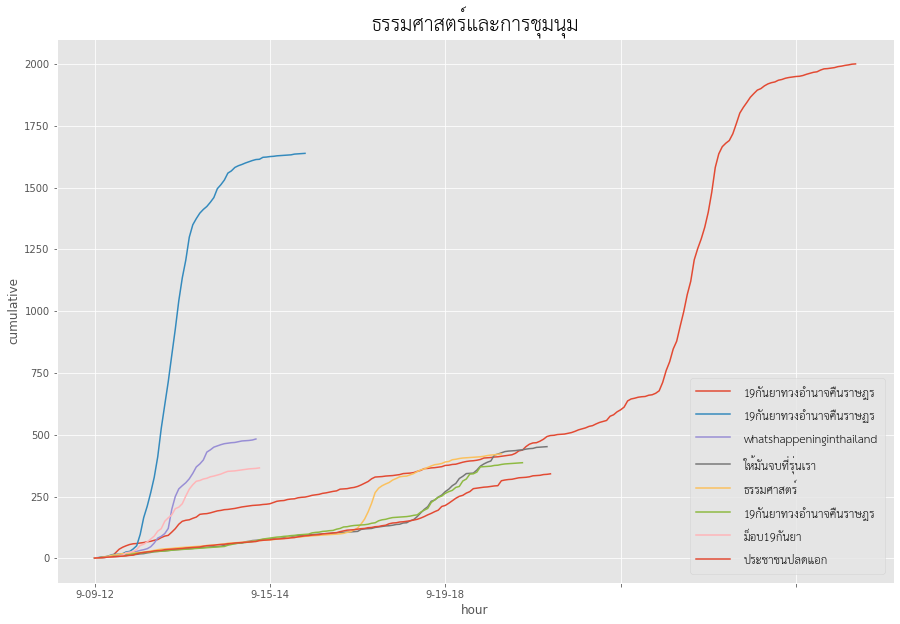

In [11]:
# hashtag time series

font = fm.FontProperties(fname=font_path,weight='bold',size=17)

def tohour(date):
    if date.day < 10:
        day = f"0{date.day}"
    else:
        day = str(date.day)
    if date.hour < 10:
        hour = f"0{date.hour}"
    else:
        hour = str(date.hour)
    return f"{date.month}-{day}-{hour}"
        

fig = plt.figure(figsize=(15,10))
for tag, c, in counter.most_common(16)[1:9]:
    tempdf = df[df.hashtags.apply(lambda x: tag in x)]
    tempdf['hour'] = tempdf['created_at'].apply(tohour)
    
    tempdf.groupby(tempdf["hour"]).count()['id'].sort_index().cumsum().plot(label=tag)
plt.title(hashtag, fontproperties=fp, fontsize=30)
plt.legend(prop=font)
plt.ylabel('cumulative')
plt.show()

In [55]:
hashtag

'เกียมอุดมไม่ก้มหัวให้เผด็จการ'

In [56]:
df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,tokens
1963,1233434129523335171,1233434129523335168,2020-02-28 23:49:47+07:00,2020-02-28,23:49:47,700,1054611170059935745,wowwiwiwiiwow,WOW,,...,,,,,[],,,,,"[ประท้วง, ออกมา]"
1964,1233420221274132481,1233419926955646976,2020-02-28 22:54:31+07:00,2020-02-28,22:54:31,700,1232372038632783883,triamprotest,เกียมอุดมไม่ก้มหัวให้เผด็จการ,,...,,,,,[],,,,,"[ประมวล, ภาพ, กิจกรรม, โรงเรียน, เตรียมอุดมศึก..."
1965,1233420118429814784,1233419926955646976,2020-02-28 22:54:06+07:00,2020-02-28,22:54:06,700,1232372038632783883,triamprotest,เกียมอุดมไม่ก้มหัวให้เผด็จการ,,...,,,,,[],,,,,"[ประมวล, ภาพ, กิจกรรม, โรงเรียน, เตรียมอุดมศึก..."
1966,1233420025312071682,1233419926955646976,2020-02-28 22:53:44+07:00,2020-02-28,22:53:44,700,1232372038632783883,triamprotest,เกียมอุดมไม่ก้มหัวให้เผด็จการ,,...,,,,,[],,,,,"[ประมวล, ภาพ, กิจกรรม, โรงเรียน, เตรียมอุดมศึก..."
1967,1233419926955646983,1233419926955646976,2020-02-28 22:53:21+07:00,2020-02-28,22:53:21,700,1232372038632783883,triamprotest,เกียมอุดมไม่ก้มหัวให้เผด็จการ,,...,,,,,[],,,,,"[ประมวล, ภาพ, กิจกรรม, โรงเรียน, เตรียมอุดมศึก..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4222,1232293524902576128,1232293524902576128,2020-02-25 20:17:25+07:00,2020-02-25,20:17:25,700,1212468282004930565,purplepepefrog,น้องม่วง𓆏,,...,,,,,[],,,,,"[น้องๆ, เกีย, มด, เร้ววววววว]"
4223,1232293385488105472,1232293385488105472,2020-02-25 20:16:52+07:00,2020-02-25,20:16:52,700,1188803703756578816,rawd0gneoy,dog on butter #ในคุกมีโควิด,,...,,,,,[],,,,,"[ปี, ณัฐวุฒิ, ไสย, เกื้อ, หนังสือ, โรงเรียน, เ..."
4224,1232291833226481664,1232291833226481664,2020-02-25 20:10:42+07:00,2020-02-25,20:10:42,700,1188803703756578816,rawd0gneoy,dog on butter #ในคุกมีโควิด,,...,,,,,[],,,,,"[ปี, นับว่า, ปี, เมื่อไม่นานนี้, เตรียม, อุดม,..."
4225,1232288035821125632,1232288035821125632,2020-02-25 19:55:37+07:00,2020-02-25,19:55:37,700,2931233642,algorithmdestin,pekAnotB,,...,,,,,[],,,,,"[เต, อย่า, เสียชื่อ, รร., หนังสือ, สังคม, เนื้..."


# oldest tweets

In [69]:
df.tail(10)[['created_at','username','tweet','retweets_count']].sort_values(['created_at'])

,created_at,username,tweet,retweets_count
278311,2020-10-16 16:10:02+07:00,uauajutatip,ย้ายมาแยกปทุมวัน เวลาเดิม ลงถนน! #16ตุลาไปราชป...,37582
278310,2020-10-16 16:11:37+07:00,humancanspeak,ไปปทุมวันกันหรอ #15ตุลาไปราชประสงค์ #16ตุลาไปร...,31
278309,2020-10-16 16:11:46+07:00,mybabytenten,ย้ายที่ค่ะ #16ตุลาไปแยกปทุมวัน,569
278308,2020-10-16 16:12:02+07:00,yg24894395,#16ตุลาไปราชประสงค์ #16ตุลาไปแยกปทุมวัน,13
278307,2020-10-16 16:12:08+07:00,originality_man,#16ตุลาไปแยกปทุมวัน,8
278306,2020-10-16 16:12:37+07:00,lycanz14,#16ตุลาไปแยกปทุมวัน,0
278305,2020-10-16 16:12:38+07:00,onedaywellc,#16ตุลาไปราชประสงค์ #16ตุลาไปแยกปทุมวัน,1
278304,2020-10-16 16:12:58+07:00,iam_jiw,แยกปทุมวันครับทุกคน!! #16ตุลาไปแยกปทุมวัน,165
278303,2020-10-16 16:13:00+07:00,warncc,แยกปทุมวัน ไปๆๆๆๆ #16ตุลาไปแยกปทุมวัน,2
278302,2020-10-16 16:13:03+07:00,originality_man,#16ตุลาไปแยกปทุมวัน,9


In [102]:
print("|datetime|username|tweet|retweet|url|\n|:-:|:-:|:-:|:-:|:-:|")
for i, row in df.tail(5)[['created_at','username','tweet','retweets_count','link']].sort_values(['created_at']).iterrows():
    row['created_at'] = str(row['created_at']).split('+')[0]
    row['retweets_count'] = str(row['retweets_count'])
    row['link'] = f"[link]({row['link']})"
    print('|'+"|".join(row)+"|")

|datetime|username|tweet|retweet|url|
|:-:|:-:|:-:|:-:|:-:|
|2020-08-08 13:26:20|nine9005|#ธรรมศาสตร์และการชุมนุม|1|[link](https://twitter.com/Nine9005/status/1291984068087701504)|
|2020-08-08 15:40:51|benjarrrrr|ขอพื้นที่ประชาสัมพันธ์งาน #ธรรมศาสตร์จะไม่ทน วันจันทร์ที่จะถึงนี้  โดยงานชุมนุมครั้งนี้ ทีมท่าพระจันทร์จะยกพลมาร่วมกับทีมรังสิตด้วยค่ะ เดือดปุดปุดยิ่งขึ้นกว่าเดิมแน่นอน!!!  (ได้ยินเสียงลือเสียงเล่าอ้างมาว่างานนี้จัดหนักจัดเต็ม ไม่มีกั๊ก) #ธรรมศาสตร์และการชุมนุม  https://t.co/AsJPSd0nmA|1163|[link](https://twitter.com/benjarrrrr/status/1292017920592080896)|
|2020-08-09 13:01:41|sixinthemn|10 สค. ไปกันคับ สถานที่ ธรรมศาสตร์ศูนย์รังสิต ณ ลานพญานาค #ธรรมศาสตร์และการชุมนุม #ธรรมศาสตร์จะไม่ทน  https://t.co/UYkJl1gUC5|2|[link](https://twitter.com/sixinthemn/status/1292340251713613826)|
|2020-08-09 14:19:52|charliethame|As admin &amp; teachers at unis &amp; schools across Thailand pressure students to avoid protests, my faculty puts this out to help students exercise their rights to f

# most frequently retweeted 

In [46]:
df.sort_values(["retweets_count"], ascending=False)[['created_at','username','tweet','retweets_count']].head(10)

,created_at,username,tweet,retweets_count
195409,2020-10-16 19:24:30+07:00,violettewautier,การชุมนุมต่อสู้เพื่อความยุติธรรม เพื่อประชาธิป...,151500
238826,2020-10-16 18:59:31+07:00,tptourpab,คุณเห็นความแตกต่างของ 2 กลุ่มนี้ไหม คุณเอะใจ ม...,107177
131489,2020-10-16 20:15:42+07:00,thebattz,อห โคตรสุดเลยภาพนี้ มือเปล่าๆประจันหน้ากับรถฉี...,94728
205938,2020-10-16 19:18:22+07:00,ud_awat,พวกคุณใช้ความรุนแรงแบบนี้กับประชาชนมือเปล่า รั...,91899
241401,2020-10-16 18:58:02+07:00,25novemm,เหี้ยมาก น้ำสีฟ้าที่มันฉีดใส่ เป็นเคมีฟิสิกส์ ...,87483
32665,2020-10-16 23:25:11+07:00,angangopilan,ล่าสุดหนูพึ่งได้ให้สัมภาษณ์กับสื่อแคนาดา (CBC ...,86561
219509,2020-10-16 19:10:18+07:00,jankzinn,มึงอันนี้เหี้ยมากอะ หลวงพี่เข้าไปไหว้คนขับรถฉี...,85091
199810,2020-10-16 19:21:50+07:00,8laryn,เซพพี่คนนี้เค้สด้วยนะคะ เห็นเค้ายืนขวางรถให้มา...,84489
194318,2020-10-16 19:25:12+07:00,vousjay2,ทุกคนอย่าให้คลิปนี้หายไป ขอร้อง ช่วยรีกันไปเยอ...,83345
173004,2020-10-16 19:42:08+07:00,liszukung,เชี่ยเอ๊ย คุณฐาปนีย์แม่งแนวหน้ามาก มีเสียงแว่ว...,83260


In [55]:
for i, row in df.sort_values(["retweets_count"], ascending=False)[['created_at','username','tweet','retweets_count','link']].head(10).iterrows():
    row['created_at'] = str(row['created_at']).split('+')[0]
    row['retweets_count'] = str(row['retweets_count'])
    row['link'] = f"[link]({row['link']})"
    print('|'+"|".join(row)+"|")

|2020-09-11 16:42:07|malykh_jj|หลายคนก่อนเข้ามาประกวดบอกอยากเป็นกระบอกเสียง อยากใช้ Platformเวทีนางงามในการแก้ปัญหา แต่พอถึงเวลามีปัญหาจริงละเงียบกริบ คือไรคุณพี่ สงสารมารีญามากที่แบกวงการนางงามอยู่ขอบคุณมารีญามากเป็นกระบอกเสียงที่ดีและมีจุดยืน #มารีญา #คัดค้านนําเข้าเศษพลาสติก #ธรรมศาสตร์และการชุมนุม  https://t.co/Eb3FV8TWjT|81673|[link](https://twitter.com/malykh_jj/status/1304354526401495040)|
|2020-02-26 18:12:52|beenobeeta|เมิงงง มธ ประกาศ จะนำ นศ ไปราชดำเนิน  ยังไงดี น้องเค้าเปิดแล้วนะ #ธรรมศาสตร์และการชุมนุม|63250|[link](https://twitter.com/beenobeeta/status/1232624568348495872)|
|2020-02-26 19:03:58|xiaozaoput|"หนังสือก็ต้องอ่าน รัฐบาลก็ต้องด่า" มันส์สุดทีน55555   #ธรรมศาสตร์และการชุมนุม  https://t.co/eZwgrW1Hty|62298|[link](https://twitter.com/Xiaozaoput/status/1232637427203706880)|
|2020-09-19 19:09:30|nnoophilaa|แม่เจ้า หนึ่งทุ่ม คนเต็มท้องสนามหลวงเลย มันแบบ... กุว่ามันจะจบที่รุ่นเราจริงๆแหละทุกคน ความหวังมันมากขึ้นไปเรื่อยๆ 😭🙏🏻 #19กันยาทวงอํานาจคืนราษฏร #ธรรมศาสตร์และการชุม

In [18]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest', 'tokens'],
      dtype='object')

In [30]:
df2[df2.geo != '']

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
